# **Deep Learning Programming with Python**
### Week5: Deep Feedforard Networks (DFNs)

**Acknowledgement**

Many of Today's contents are adopted from the below resources:

1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.python-course.eu/machine_learning_data_visualization.php
3. http://yann.lecun.com/exdb/mnist/
4. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
5. https://pytorch.org/vision/0.8/transforms.html
6. https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
7. https://colab.research.google.com/github/jigsawlabs-student/pytorch-intro-curriculum/blob/main/5-training-mathematically/20-backpropagation-and-gradient-descent.ipynb#scrollTo=inner-light
---



# K-NN vs. DFNs
---
##  1. k-Nearest Neighbor (K-NN)
## A. SKKU binary classification dataset
SKKU binary classification dataset (Plane vs. No Plane) created by Jangwon Lee leejang@skku.edu

This dataset is constructed based on the below reference datasets

[1] Fine-Grained Visual Classification of Aircraft, S. Maji, J. Kannala, E. Rahtu, M. Blaschko, A. Vedaldi, arXiv.org, 2013

[2] http://www.vision.caltech.edu/Image_Datasets/Caltech101/


#### Mount Google Drive & Files

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/K_Mooc_Deep_Learning_Programming_with_Python/SKKU_binary.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
!ls -al /tmp
!ls -al /tmp/dataset
!ls -al /tmp/dataset/train

total 56
drwxrwxrwt 1 root root 4096 Jun 20 15:18 .
drwxr-xr-x 1 root root 4096 Jun 20 15:11 ..
-rw-r--r-- 1 root root 1183 Jun 20 15:11 dap_multiplexer.458fa3af24a3.root.log.INFO.20230620-151131.83
lrwxrwxrwx 1 root root   61 Jun 20 15:11 dap_multiplexer.INFO -> dap_multiplexer.458fa3af24a3.root.log.INFO.20230620-151131.83
drwxr-xr-x 4 root root 4096 Jun 20 15:18 dataset
srwxr-xr-x 1 root root    0 Jun 20 15:11 debugger_4jewlv8gb
-rw-r--r-- 1 root root 1188 Jun 20 15:16 directoryprefetcher_binary.458fa3af24a3.root.log.INFO.20230620-151609.1433
lrwxrwxrwx 1 root root   74 Jun 20 15:16 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.458fa3af24a3.root.log.INFO.20230620-151609.1433
srw------- 1 root root    0 Jun 20 15:16 drivefs_ipc.0
srw------- 1 root root    0 Jun 20 15:16 drivefs_ipc.0_shell
drwx------ 2 root root 4096 Jun 20 15:11 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root 2425 Jun 20 15:15 language_service.458fa3af24a3.root.log.INFO.20230620-151218.328
lrwxrwxrwx 1

In [8]:
base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training plane pictures
train_planes_dir = os.path.join(train_dir, 'planes')

# Directory with our training no plane pictures
train_no_planes_dir = os.path.join(train_dir, 'no_planes')

# Directory with our test plane pictures
test_planes_dir = os.path.join(test_dir, 'planes')

# Directory with our test no plane pictures
test_no_planes_dir = os.path.join(test_dir, 'no_planes')

In [9]:
train_plane_fnames = os.listdir(train_planes_dir)
print(train_plane_fnames[:10])

train_no_plane_fnames = os.listdir(train_no_planes_dir)
train_no_plane_fnames.sort()
print(train_no_plane_fnames[:10])

['0912833.jpg', '1699127.jpg', '1763802.jpg', '0536511.jpg', '0181735.jpg', '2067977.jpg', '1660305.jpg', '2259876.jpg', '0846826.jpg', '2122829.jpg']
['BACKGROUND_Google_image_0008.jpg', 'BACKGROUND_Google_image_0010.jpg', 'BACKGROUND_Google_image_0015.jpg', 'BACKGROUND_Google_image_0020.jpg', 'BACKGROUND_Google_image_0034.jpg', 'BACKGROUND_Google_image_0036.jpg', 'BACKGROUND_Google_image_0058.jpg', 'BACKGROUND_Google_image_0060.jpg', 'BACKGROUND_Google_image_0065.jpg', 'BACKGROUND_Google_image_0085.jpg']


In [10]:
print('total training planes images:', len(os.listdir(train_planes_dir)))
print('total training no_planes images:', len(os.listdir(train_no_planes_dir)))
print('total test planes images:', len(os.listdir(test_planes_dir)))
print('total test no_planes images:', len(os.listdir(test_no_planes_dir)))

total training planes images: 1000
total training no_planes images: 1000
total test planes images: 500
total test no_planes images: 500


Now let's take a look at a few pictures to get a better sense of what the planes and no_planes datasets look like.
 First, configure the matplot parameters:

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 plane and 8 no_plane pictures. You can rerun the cell to see a fresh batch each time:

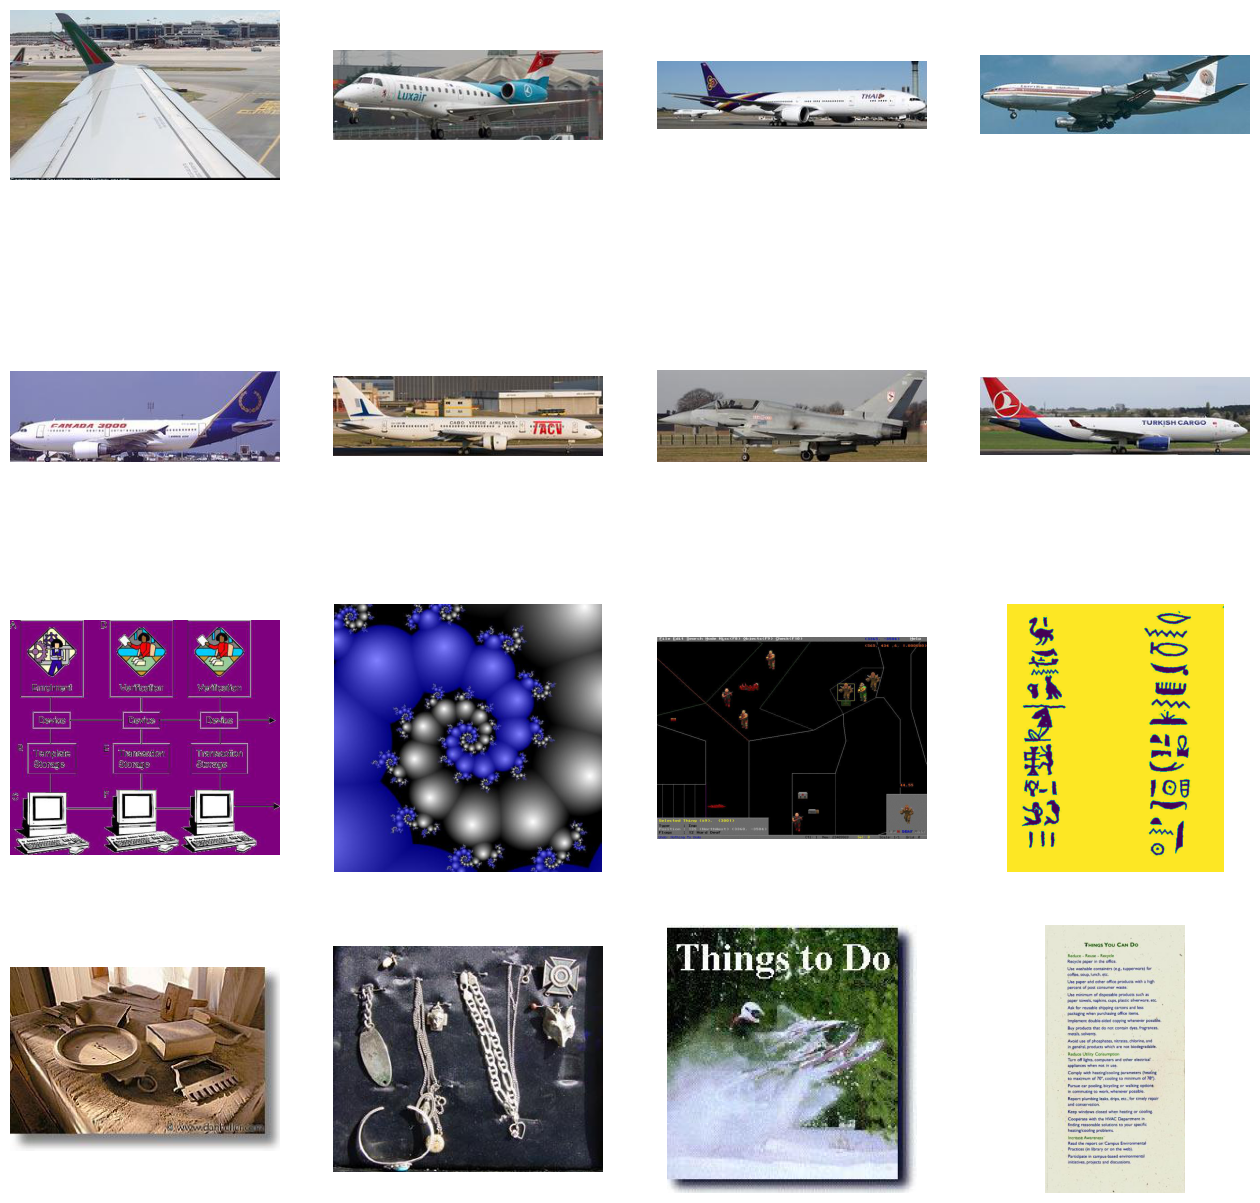

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_plane_pix = [os.path.join(train_planes_dir, fname)
                for fname in train_plane_fnames[pic_index-8:pic_index]]
next_no_plane_pix = [os.path.join(train_no_planes_dir, fname)
                for fname in train_no_plane_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_plane_pix+next_no_plane_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### B. Loading the SKKU binary classification dataset
#### Without any fancy libraries like Tensorflow or Pytorch

In [13]:
import numpy as np
from pathlib import Path
from skimage.io import imread
from sklearn.utils import Bunch
from skimage.transform import resize

def load_image_files(container_path, dimension=(50, 50, 3)):
    """
    Load image files with categories as subfolder names
    which performs like scikit-learn sample dataset

    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to

    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files(train_dir)

#### Using keras.preprocessing

Let's load these images off disk using the helpful [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [load images](https://www.tensorflow.org/tutorials/load_data/images) tutorial.

In [14]:
import tensorflow as tf
from tensorflow import keras

################################
batch_size = 32
num_of_train_imgs = 2000
num_of_test_imgs = 1000
img_height = 50
img_width = 50

################################

# Train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=num_of_test_imgs)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
Found 1000 files belonging to 2 classes.


In [15]:
class_names = train_ds.class_names
print(class_names)

['no_planes', 'planes']


## Visualize the data

Here are the first 9 images from the training dataset.

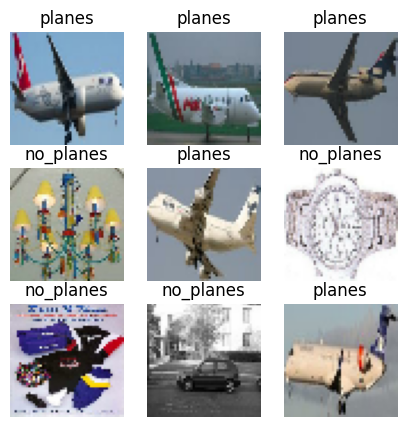

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Checking out the return value of the image_dataset_from_directory function!

In [17]:
print(type(train_ds))

for image_batch, labels_batch in train_ds:
  # image_batch: tensors of shape (data_size, image_size[0], image_size[1], num_channels)
  Xtr = image_batch.numpy()
  print(Xtr.shape)
  # labels_batch: the labels are an int32 tensor of shape (data_size,)
  Ytr = labels_batch.numpy()
  print(Ytr.shape)
  break


# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1600 x (50 x 50 x 3 = 7500)
print(Xtr_rows.shape)

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
(1600, 50, 50, 3)
(1600,)
(1600, 7500)


#### C. Building kNN classifier

It consists of two stages:
* During training, the classifier takes the training data and simply remembers it
* During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
* The value of k is a hypter parameter that can be found by cross-validation test!

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr_rows, Ytr)

KNeighborsClassifier(n_neighbors=3)

In [19]:
for image_batch, labels_batch in test_ds:
  # image_batch: tensors of shape (batch_size, image_size[0], image_size[1], num_channels)
  Xte = image_batch.numpy()
  print(Xte.shape)
  # labels_batch: the labels are an int32 tensor of shape (batch_size,)
  Yte = labels_batch.numpy()
  print(Yte.shape)
  break

# flatten out all images to be one-dimensional
Xte_rows = Xte.reshape(Xte.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1000 x (50 x 50 x 3 = 7500)
print(Xte_rows.shape)

(1000, 50, 50, 3)
(1000,)
(1000, 7500)


In [20]:
#check accuracy of our model on the test data
knn.score(Xte_rows, Yte)

0.884

### 2 Deep Feedforward Neural Networks (DFNs)

#### A. Building Your own  Deep (in fact, it will have only three layers :) from Scratch using Keras!

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
# Our input feature map is 50x50x3 = 7500
# Create a fully connected layer with ReLU activation and 1024 hidden units
model.add(Dense(1024, input_dim=7500, activation='relu'))
# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              7681024   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 8,206,337
Trainable params: 8,206,337
Non-trainable params: 0
_________________________________________________________________


We will use "binary cross entropy as our loss function" and "RMSprop" as our optimizer

In [23]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

B. Now. let's train the our first model and check the model’s performance on the test set!

In [24]:
history = model.fit(Xtr_rows, Ytr, epochs=20, batch_size=16, validation_data=(Xte_rows, Yte))

Epoch 1/20
100/100 [==============================] - 11s 104ms/step - loss: 488.4460 - acc: 0.5069 - val_loss: 0.7250 - val_acc: 0.7810
Epoch 2/20
100/100 [==============================] - 10s 102ms/step - loss: 8.3074 - acc: 0.5575 - val_loss: 0.7364 - val_acc: 0.5110
Epoch 3/20
100/100 [==============================] - 10s 102ms/step - loss: 5.6152 - acc: 0.5100 - val_loss: 0.7083 - val_acc: 0.5570
Epoch 4/20
100/100 [==============================] - 11s 112ms/step - loss: 0.7359 - acc: 0.5188 - val_loss: 0.7296 - val_acc: 0.5030
Epoch 5/20
100/100 [==============================] - 11s 106ms/step - loss: 1.5468 - acc: 0.5138 - val_loss: 0.7247 - val_acc: 0.5070
Epoch 6/20
100/100 [==============================] - 10s 103ms/step - loss: 0.9665 - acc: 0.5075 - val_loss: 0.7235 - val_acc: 0.5100
Epoch 7/20
100/100 [==============================] - 10s 103ms/step - loss: 0.6897 - acc: 0.5106 - val_loss: 0.7034 - val_acc: 0.5170
Epoch 8/20
100/100 [==============================] -

C. Change our model using convolutional layers!

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 50x50x3: 50x50 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(50, 50, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          1849

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
history = model.fit(Xtr, Ytr, epochs=20, batch_size=16, validation_data=(Xte, Yte))

Epoch 1/20
100/100 [==============================] - 2s 8ms/step - loss: 2.0667 - acc: 0.7613 - val_loss: 0.4075 - val_acc: 0.8260
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: 0.3913 - acc: 0.8525 - val_loss: 0.2964 - val_acc: 0.8800
Epoch 3/20
100/100 [==============================] - 1s 6ms/step - loss: 0.2577 - acc: 0.9125 - val_loss: 0.4198 - val_acc: 0.8560
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: 0.2198 - acc: 0.9206 - val_loss: 0.3091 - val_acc: 0.8940
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.1401 - acc: 0.9531 - val_loss: 0.3415 - val_acc: 0.9030
Epoch 6/20
100/100 [==============================] - 1s 6ms/step - loss: 0.1491 - acc: 0.9569 - val_loss: 0.3060 - val_acc: 0.9080
Epoch 7/20
100/100 [==============================] - 1s 6ms/step - loss: 0.1381 - acc: 0.9644 - val_loss: 0.3752 - val_acc: 0.9180
Epoch 8/20
100/100 [==============================] - 1s 6ms/step - loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

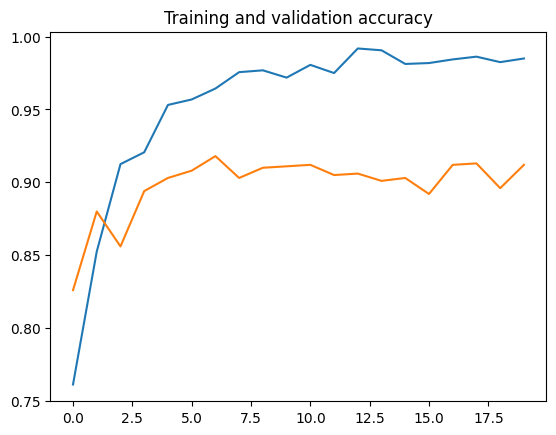

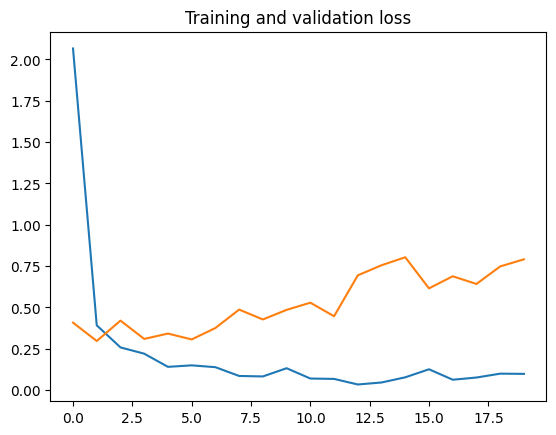

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')